<a href="https://colab.research.google.com/github/BossDevinator/IS_4482/blob/main/A3_Moore_Devan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 3: Decision Tree Classification and Evaluation
###Author: Devan Moore
9/4/2024

#Chunk 1:
###Set up, data import and inspection code for the following

In [1]:
import pandas as pd
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/matthewpecsok/4482_fall_2024/main/data/CD_additional_balanced.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
1,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
3,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9280 non-null   int64  
 1   job             9280 non-null   object 
 2   marital         9280 non-null   object 
 3   education       9280 non-null   object 
 4   default         9280 non-null   object 
 5   housing         9280 non-null   object 
 6   loan            9280 non-null   object 
 7   contact         9280 non-null   object 
 8   month           9280 non-null   object 
 9   day_of_week     9280 non-null   object 
 10  duration        9280 non-null   int64  
 11  campaign        9280 non-null   int64  
 12  pdays           9280 non-null   int64  
 13  previous        9280 non-null   int64  
 14  poutcome        9280 non-null   object 
 15  emp.var.rate    9280 non-null   float64
 16  cons.price.idx  9280 non-null   float64
 17  cons.conf.idx   9280 non-null   f

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000
mean,40.403448,387.361746,2.333297,887.282435,0.315302,-0.496272,93.479178,-40.218125,2.960209,5135.306487
std,12.062030,357.711742,2.334467,313.802415,0.700671,1.721204,0.634510,5.360642,1.890402,87.105317
min,17.000000,1.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,145.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,265.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,528.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4199.000000,39.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.shape

(9280, 21)

In [7]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


#Chunk 2:
###Target Variable

In [8]:
y_count = df.y.value_counts()
y_proportion = df.y.value_counts(normalize=True)
print(y_count)
print(y_proportion)

y
yes    4640
no     4640
Name: count, dtype: int64
y
yes    0.5
no     0.5
Name: proportion, dtype: float64


This target variable is perfectly split between 4,640 'yes' and 4,640 'no'. It is balanced at 50% for both.

In [9]:
y_target = df.pop('y')

#Chunk 3:
###Data Preparation

Within this data set the following features are categorical:


*   Marital
*   Job
*   Education
*   Default
*   Housing
*   Loan
*   Month
*   Day of week
*   Contact
*   Campaign
*   Previous
*   Poutcome

And these are quantitative:

*   age
*   duration
*   pdays
*   emp.var.rate
*   cons.price.idx
*   cons.conf.idx
*   eurabor3m
*   nr.employed



In [10]:
marital_count = df.marital.value_counts()
print(marital_count)
job_count = df.job.value_counts()
print(job_count)
education_count = df.education.value_counts()
print(education_count)
default_count = df.default.value_counts()
print(default_count)
housing_count = df.housing.value_counts()
print(housing_count)
loan_count = df.loan.value_counts()
print(loan_count)
month_count = df.month.value_counts()
print(month_count)
day_count = df.day_of_week.value_counts()
print(day_count)
contact_count = df.contact.value_counts()
print(contact_count)
campaign_count = df.campaign.value_counts()
print(campaign_count)
previous_count = df.previous.value_counts()
print(previous_count)
poutcome_count = df.poutcome.value_counts()
print(poutcome_count)

marital
married     5338
single      2900
divorced    1021
unknown       21
Name: count, dtype: int64
job
admin.           2517
blue-collar      1769
technician       1459
services          773
management        651
retired           595
student           358
entrepreneur      308
self-employed     306
unemployed        248
housemaid         216
unknown            80
Name: count, dtype: int64
education
university.degree      3007
high.school            2102
professional.course    1190
basic.9y               1177
basic.4y                895
basic.6y                458
unknown                 445
illiterate                6
Name: count, dtype: int64
default
no         7824
unknown    1456
Name: count, dtype: int64
housing
yes        4951
no         4104
unknown     225
Name: count, dtype: int64
loan
no         7688
yes        1367
unknown     225
Name: count, dtype: int64
month
may    2533
jul    1477
aug    1353
jun    1169
nov     886
apr     785
oct     369
mar     313
sep     295
dec

In [11]:
df = df.astype({'marital': 'category',
                                          'job': 'category',
                                          'education': 'category',
                                          'default': 'category',
                                          'housing': 'category',
                                          'loan': 'category',
                                          'month': 'category',
                                          'day_of_week': 'category',
                                          'contact': 'category',
                                          'campaign': 'category',
                                          'previous': 'category',
                                          'poutcome': 'category'})
df.dtypes

,0
age,int64
job,category
marital,category
education,category
default,category
housing,category
loan,category
contact,category
month,category
day_of_week,category


In [12]:
df_encoded_X = pd.get_dummies(df)

df_encoded_X.head()

,age,duration,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,...,previous_0,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6,poutcome_failure,poutcome_nonexistent,poutcome_success
0,41,1575,999,1.1,93.994,-36.4,4.857,5191.0,False,True,...,True,False,False,False,False,False,False,False,True,False
1,49,1042,999,1.1,93.994,-36.4,4.857,5191.0,False,False,...,True,False,False,False,False,False,False,False,True,False
2,49,1467,999,1.1,93.994,-36.4,4.857,5191.0,False,False,...,True,False,False,False,False,False,False,False,True,False
3,41,579,999,1.1,93.994,-36.4,4.857,5191.0,False,False,...,True,False,False,False,False,False,False,False,True,False
4,45,461,999,1.1,93.994,-36.4,4.857,5191.0,False,True,...,True,False,False,False,False,False,False,False,True,False


#Chunk 4:
###Train and Evaluate Simple Decision Tree 1 to classify y

In [13]:
random_state = 24

In [14]:
tree_model_1 = tree.DecisionTreeClassifier(random_state=random_state,ccp_alpha=.10)
tree_model_1

DecisionTreeClassifier(ccp_alpha=0.1, random_state=24)

In [15]:
tree_model_1 = tree_model_1.fit(df_encoded_X,y_target)

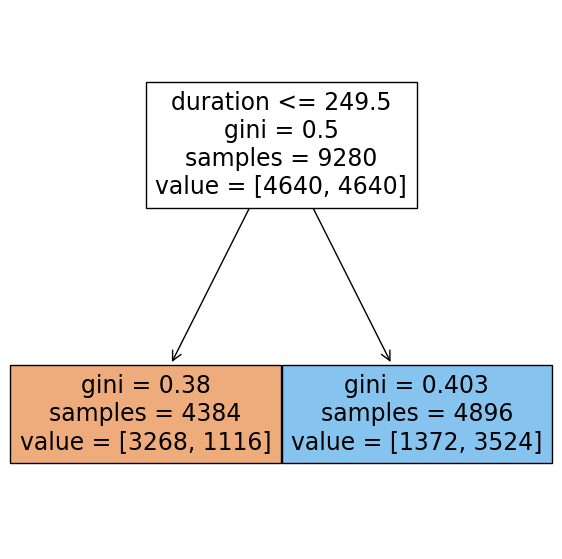

In [16]:
fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(tree_model_1,
                   feature_names=df_encoded_X.columns.to_list(),
                   filled=True)

The root of the decision tree is based on the duration. The initial splitting value is <=249.5

Duration <= 249.5 = subscribe, Duration > 249.5 = Did not subscribe

Intial root: 4640 yes and 4640 no (no majority class).
In that case, we can look at one of the two leaf nodes below. for subscribing to a CD, the values are: 3268 yes and 1116 no. This is a result in 1116 misclassifications, far better than just a vague 50/50 split.

entropy measures disorder within a dataset. So in this case, with a perfect 50/50 split in the root node, the entropy = 1. This means that the data is unorganized and being able to inpurperet results can be difficult, if not, impossible.

In [17]:
model_1_pred = tree_model_1.predict(df_encoded_X)
print("Prediction: " ,model_1_pred)
print()
model_1_cf = confusion_matrix(y_true=y_target, y_pred=model_1_pred)
print("Confusion Matrix: " ,model_1_cf)
print()
print(metrics.classification_report(y_target, tree_model_1.predict(df_encoded_X)))

Prediction:  ['yes' 'yes' 'yes' ... 'no' 'no' 'no']

Confusion Matrix:  [[3268 1372]
 [1116 3524]]

              precision    recall  f1-score   support

          no       0.75      0.70      0.72      4640
         yes       0.72      0.76      0.74      4640

    accuracy                           0.73      9280
   macro avg       0.73      0.73      0.73      9280
weighted avg       0.73      0.73      0.73      9280



#CHUNK 5:
###Train and Evaluate more complex Decision Tree 2 to classify y

In [18]:
tree_model_2 = tree.DecisionTreeClassifier(random_state=random_state,ccp_alpha=0.005)
tree_model_2


tree_model_2 = tree_model_2.fit(df_encoded_X,y_target)


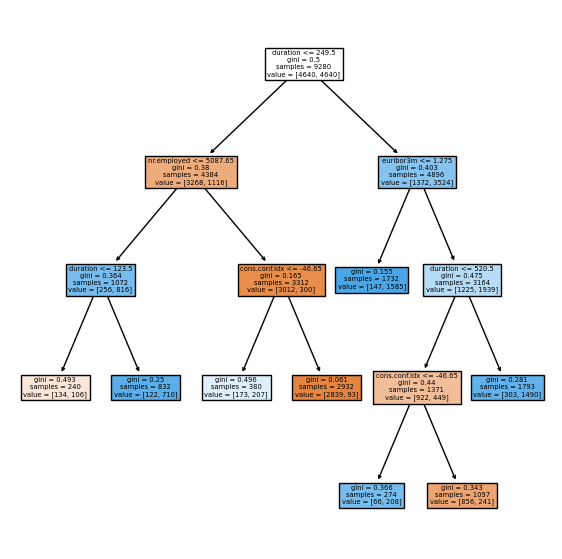

In [19]:
fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(tree_model_2,
                   feature_names=df_encoded_X.columns.to_list(),
                   filled=True)

In [20]:
model_2_pred = tree_model_2.predict(df_encoded_X)
print("Prediction: " ,model_2_pred)
print()
model_2_cf = confusion_matrix(y_true=y_target, y_pred=model_2_pred)
print("Confusion Matrix: " ,model_2_cf)
print()
print(metrics.classification_report(y_target, tree_model_2.predict(df_encoded_X)))

Prediction:  ['yes' 'yes' 'yes' ... 'no' 'no' 'no']

Confusion Matrix:  [[3829  811]
 [ 440 4200]]

              precision    recall  f1-score   support

          no       0.90      0.83      0.86      4640
         yes       0.84      0.91      0.87      4640

    accuracy                           0.87      9280
   macro avg       0.87      0.87      0.86      9280
weighted avg       0.87      0.87      0.86      9280



#CHUNK 6:
###Duration Removed Decision Tree 3 to predict y

In [21]:
df_encoded_X_no_duration = df_encoded_X.drop(columns=['duration'])

In [22]:
tree_model_3 = tree.DecisionTreeClassifier(random_state=random_state, ccp_alpha=0.0018)
tree_model_3 = tree_model_3.fit(df_encoded_X_no_duration, y_target)

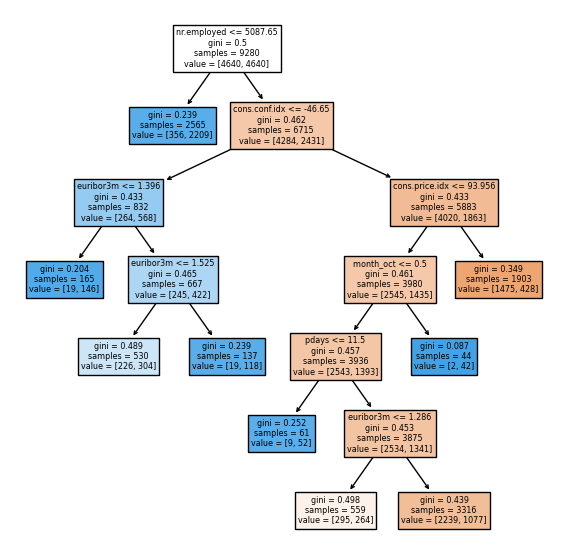

In [23]:
fig = plt.figure(figsize=(7, 7))
_ = tree.plot_tree(tree_model_3,
                   feature_names=df_encoded_X_no_duration.columns.to_list(),
                   filled=True)

In [24]:
model_3_pred = tree_model_3.predict(df_encoded_X_no_duration)
print("Prediction: " ,model_3_pred)
print()
model_3_cf = confusion_matrix(y_true=y_target, y_pred=model_3_pred)
print("Confusion Matrix: " ,model_3_cf)
print()
print(metrics.classification_report(y_target, tree_model_3.predict(df_encoded_X_no_duration)))

Prediction:  ['no' 'no' 'no' ... 'yes' 'no' 'no']

Confusion Matrix:  [[4009  631]
 [1769 2871]]

              precision    recall  f1-score   support

          no       0.69      0.86      0.77      4640
         yes       0.82      0.62      0.71      4640

    accuracy                           0.74      9280
   macro avg       0.76      0.74      0.74      9280
weighted avg       0.76      0.74      0.74      9280



From model 3, we see that the performance actually went down. It became more sloppy with errors. This is likely due to the fact that duration was one of the biggest factors in predicting whether or not a customer would subscribe to a CD. Without duration, the effectiveness of the model went down.

#CHUNK 7:
###Describe and compare the three models

As we can see from the performance scores below that the tree model 2 was the most successful. We can easily see this from the precision and f1-scores. For example, within model 2, the precision is nearly equal to 1 with precision-no=0.90 and precision-yes=0.84, the highest precision rankings out of every other model. The f1-Accuracy-score was a great 0.87, again, the highest out of any other model.

This is due to a number of factors. The biggest one being the less pruning of the model. Model 1 had a significant amount of pruning, only allowing one decision-factor to be made and only 2 leaf-nodes. Model 2 had far less pruning and resulted in multiple decision-factors and 8 leaf-nodes, helping to narrow down data classes and bring the accuracy levels up. The final model, Model 3, had the same number of leaf-nodes, but the removal of the duration-factor dramatically hindered the accuracy of this particular model.

In [25]:
print(metrics.classification_report(y_target, tree_model_1.predict(df_encoded_X)))
print()
print(metrics.classification_report(y_target, tree_model_2.predict(df_encoded_X)))
print()
print(metrics.classification_report(y_target, tree_model_3.predict(df_encoded_X_no_duration)))

              precision    recall  f1-score   support

          no       0.75      0.70      0.72      4640
         yes       0.72      0.76      0.74      4640

    accuracy                           0.73      9280
   macro avg       0.73      0.73      0.73      9280
weighted avg       0.73      0.73      0.73      9280


              precision    recall  f1-score   support

          no       0.90      0.83      0.86      4640
         yes       0.84      0.91      0.87      4640

    accuracy                           0.87      9280
   macro avg       0.87      0.87      0.86      9280
weighted avg       0.87      0.87      0.86      9280


              precision    recall  f1-score   support

          no       0.69      0.86      0.77      4640
         yes       0.82      0.62      0.71      4640

    accuracy                           0.74      9280
   macro avg       0.76      0.74      0.74      9280
weighted avg       0.76      0.74      0.74      9280



#EXPORTING